## Analyze user statistics for Lingscape data

With this script, you can analyze user activity and monthly statistics for the Lingscape data.

This script was used in the following study:

Purschke, Christoph (forthcoming): Using crowdsourced data to explore the linguistic landscape of cities. Results from the participatory research project Lingscape. In: Brunn, Stanley / Kehrein, Roland (eds.): Handbook of the Changing World Language Map. Heidelberg: Springer.

In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
%matplotlib inline

With the following cell, you define the size and graphical style for the plots made using pyplot.

In [2]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

### Step 1: Analyze user behavior and find different user types

First, we need to open the dataset with the user statistics.

In [3]:
#Read the csv file
dataset=pd.read_csv('user_statistics_2019-04.csv', sep=';')

With the following cell, you can finter the dataset as for specific ranges of valies. Enter the upper limits for **number of uploads**, **months of participation**, and **average number of languages per sign**.

In [4]:
# Filter dataset to users with less than 1000 uploads
uploadrange = dataset.uploads < 1000
dataset = dataset[uploadrange]

# Filter  dataset to users with less than 20 months of participation
#monthrange = dataset.participation_months < 20
#dataset = dataset[monthrange]

# Filter dataset to users with at least 1 language per sign on average
#langrange = dataset.langs_average >= 1
#dataset = dataset[langrange]

You can print the summary statistics for the dataset to explore the composition of the data.

In [5]:
#Print descriptive statistics of the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
uploads,835.0,12.851497,49.146792,1.0,1.0,2.0,8.0,787.0
language_sign_average,835.0,1.476647,0.730210,0.0,1.0,1.3,2.0,8.5
participation_months,835.0,1.627545,2.003344,1.0,1.0,1.0,1.0,26.0
upload_month_average,835.0,6.762874,18.368042,1.0,1.0,2.0,5.0,264.0


With the next cell, you can plot a chart of the value distribution for a specific data column.

Text(0.5, 0, 'months of participation')

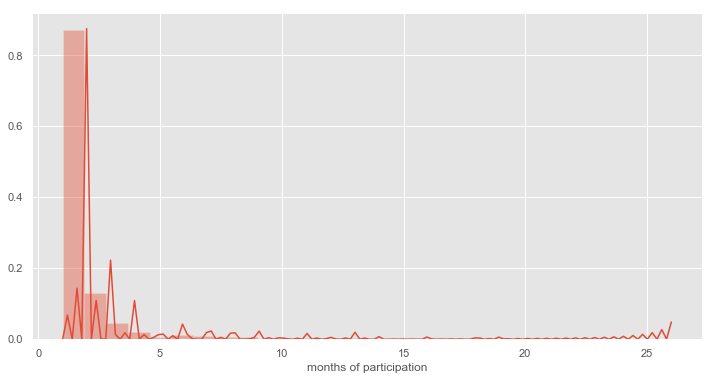

In [6]:
# Visualizing the data - distplot
# Enter the column name in the square brackets
plot_data = sns.distplot(dataset["participation_months"])
#plot_months = sns.distplot(dataset["participation_months"])
plt.xlabel('months of participation')

To prepare for clustering the users by months of participation and number of upload, we need to determine **the optimal number of clusters**, i.e., the number of distinctive groups in the dataset. To do so, we use the so-called **elbow criterion** (see https://en.wikipedia.org/wiki/Elbow_method_(clustering)).

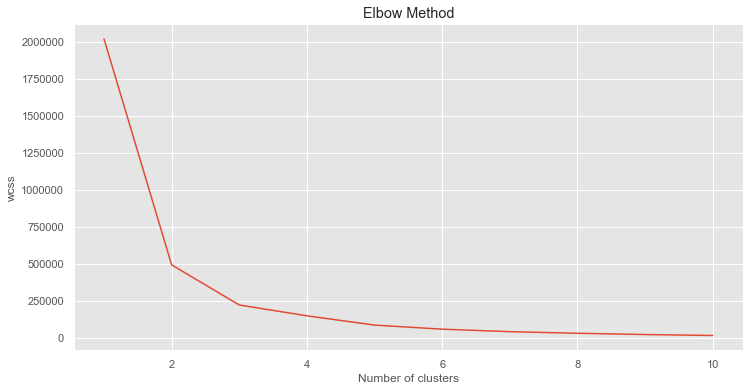

In [7]:
# Using the elbow method to find the optimum number of clusters
wcss = []
# Define the two data colums you want to use for clustering in the brackets
X = dataset[['uploads', 'participation_months']].values
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Based on the elbow method, the optimal number of clusters the data is 3. Thus, in the next cell, you can enter the number 3 as **n_clusters** to define the number of groups for the scatter plot.

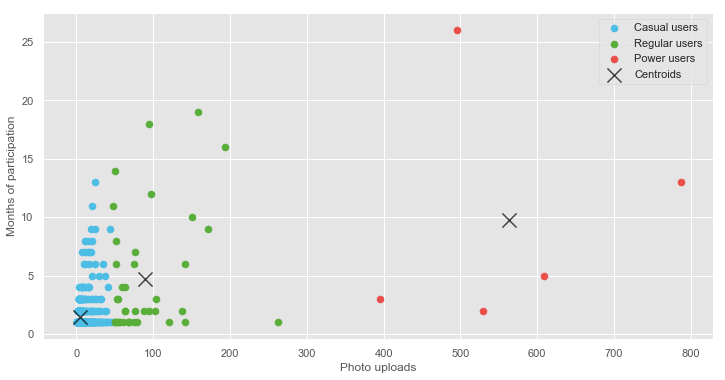

In [8]:
# Fit kmeans to the dataset with by by entering the number of clusters in n_clusters=3
km3=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km3.fit_predict(X)

# Visualize the 3-cluster solution. You chsose the size (s=), color (c=), and label (label=) for each cluster 
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='#4CBDE5',label='Casual users')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='#59AE39',label='Regular users')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='#E94E48',label='Power users')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],s=200,marker='x', c='#000000', 
            alpha=0.7, label='Centroids')

# You can add labels for the axes as well as a title for the plot
#plt.title('Lingscape user profiles')
plt.xlabel('Photo uploads')
plt.ylabel('Months of participation')
plt.legend()

# Save figure to file
plt.savefig('user_profiles.png', dpi=300, format='png') 

In addition to the plot, you can print the x and y values for the centroids to determine the average value for the chosen colums per group, in our case **photo uploads** and **months of participation**.

In [19]:
# Print centroid values for clusters
centroids = km3.cluster_centers_
print("uploads average  months average")
print(centroids)

uploads average  months average
[[  5.47974684   1.42025316]
 [563.           9.8       ]
 [ 89.675        4.7       ]]


Additionally, we can print the **number of elememts per cluster** to determine the size of the user groups.

In [10]:
# Print number of elements per cluster
print(Counter(km3.labels_))

Counter({0: 790, 2: 40, 1: 5})


### Step 2: Analyze monthly statistics by user activity and number of upload

In a second step, we will plot some basic monthly statistics for user activity.

First, we need to open the dataset with the month statistics.

In [11]:
#Read the csv file
dataset2=pd.read_csv('monthly_statistics_2019-04.csv', sep=';')
#descriptive statistics of the dataset
dataset2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Uploads total,35.0,448.057143,365.841411,1.0,174.5,343.0,643.5,1557.0
Users total,35.0,40.600000,22.460685,1.0,24.0,38.0,52.0,95.0


Then, we can create a barplot for the number of uploads per month.

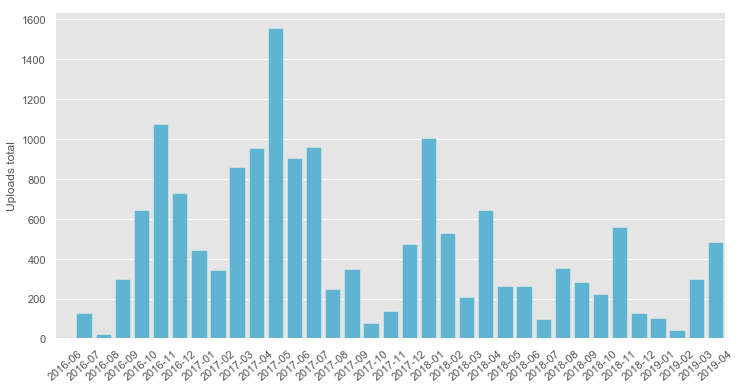

In [12]:
# Define size and layout for plotting
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

# Set label for x-axis to invisible
plt.xlabel('Uploads per month').set_visible(False)

# Define value and label column for the plot
values = dataset2["Uploads total"]
labels = (dataset2["Month"])
y_pos = np.arange(len(values))
 
# Create bars
sns.barplot(y_pos, values, color='#4CBDE5')
 
# Create names on the x-axis
plt.xticks(y_pos, labels, rotation=40)

# Save figure to file
plt.savefig('uploads_per_month.png', dpi=300, format='png') 

Now, you can simply repeat the same step to plot the number of users per month.

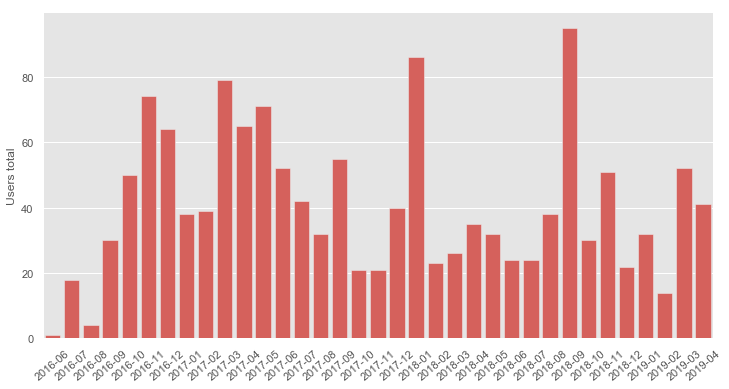

In [13]:
# Define size and layout for plotting
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

# Set label for x-axis to invisible
plt.xlabel('Users per month').set_visible(False)

# Define value and label column for the plot
values = dataset2["Users total"]
labels = (dataset2["Month"])
y_pos = np.arange(len(values))
 
# Create bars
sns.barplot(y_pos, values, color='#E94E48')
 
# Create names on the x-axis
plt.xticks(y_pos, labels, rotation=40)

# Save figure to file
plt.savefig('users_per_month.png', dpi=300, format='png') 

### Step 3: Analyze montly statistics as for different activitiy types

In a third step, we can reproduce the steps we used to find different types of users for the monthly statistics. In doing so, we can determine different types of months in relation to the number of uploads and active users.

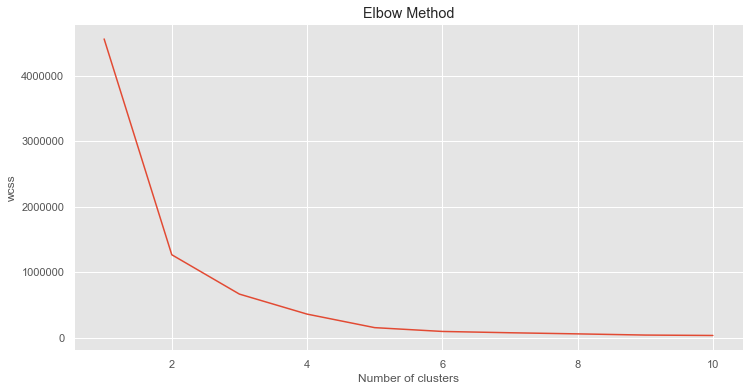

In [22]:
# Using the elbow method to find the optimum number of clusters
wcss = []
# Define the two data colums you want to use for clustering in the brackets
X = dataset2[['Uploads total', 'Users total']].values
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

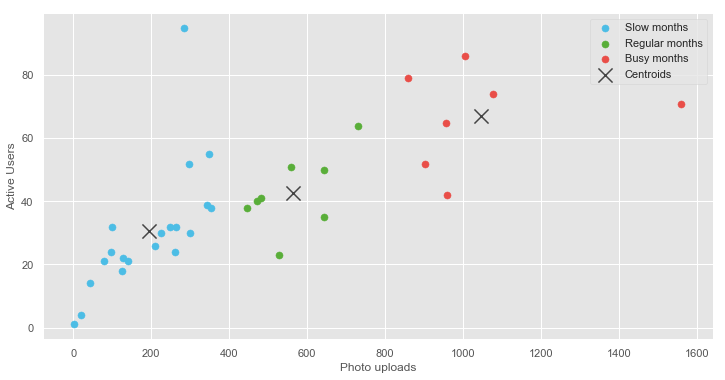

In [23]:
# Fit kmeans to the dataset with by by entering the number of clusters in n_clusters=3
km3=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km3.fit_predict(X)

# Visualize the 3-cluster solution. You chsose the size (s=), color (c=), and label (label=) for each cluster 
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='#4CBDE5',label='Slow months')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='#59AE39',label='Regular months')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='#E94E48',label='Busy months')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],s=200,marker='x', c='#000000', 
            alpha=0.7, label='Centroids')
# You can add labels for the axes as well as a title for the plot
#plt.title('Lingscape user profiles')
plt.xlabel('Photo uploads')
plt.ylabel('Active Users')
plt.legend()

# Save figure to file
plt.savefig('month_profiles.png', dpi=300, format='png') 

In [24]:
# Print centroid values for clusters
centroids = km3.cluster_centers_
print("Uploads total  Users total")
print(centroids)

Uploads total  Users total
[[ 193.3          30.5       ]
 [1044.85714286   67.        ]
 [ 562.75         42.75      ]]


In [26]:
# Print number of elements per cluster
print(Counter(km3.labels_))

Counter({0: 20, 2: 8, 1: 7})
